In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [47]:
#  Load the Dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\zomato_data.csv")

In [48]:
print(df.head())
print(df.info())
print(df.describe())

  online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian              

In [49]:
df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], np.nan)
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['rate'] = df['rate'].fillna(df['rate'].median())

In [50]:
print(df.columns)

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')


In [51]:
df.rename(columns={'approx_costfor_two_people': 'cost'}, inplace=True)


In [52]:
df['cost'] = df['cost'].astype(str).str.replace(',', '').str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df['cost'] = df['cost'].fillna(df['cost'].median())


In [34]:
# Check missing values
df.isnull().sum()


online_order         0
book_table           0
rate                 0
votes                0
rest_type          227
dish_liked       28078
cuisines            45
cost                 0
listed_intype        0
listed_incity        0
dtype: int64

In [53]:
df.dropna(subset=['rest_type', 'cuisines', 'dish_liked'], inplace=True)

In [54]:
df.isnull().sum()


online_order     0
book_table       0
rate             0
votes            0
rest_type        0
dish_liked       0
cuisines         0
cost             0
listed_intype    0
listed_incity    0
dtype: int64

In [65]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [43]:
df['rest_type'].value_counts().head(10)


rest_type
Casual Dining         7424
Quick Bites           5289
Cafe                  2409
Dessert Parlor        1086
Casual Dining, Bar    1008
Delivery               707
Bar                    369
Bar, Casual Dining     361
Takeaway, Delivery     347
Pub                    327
Name: count, dtype: int64

In [44]:
df['online_order'].value_counts()


online_order
Yes    16466
No      7103
Name: count, dtype: int64

In [45]:
df.sort_values(by='rate', ascending=False).head(10)


,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,listed_intype,listed_incity
28403,Yes,Yes,4.9,2227,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos",1500.0,Dine-out,Koramangala 4th Block
37613,Yes,Yes,4.9,2256,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Pubs and bars,Koramangala 7th Block
37099,No,Yes,4.9,6490,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,Dine-out,Koramangala 7th Block
51042,No,Yes,4.9,3004,Casual Dining,"Pizza, Mutton Kebab, Chicken Biryani, Sea Food...","Asian, Mediterranean, North Indian, BBQ",1400.0,Dine-out,Whitefield
29271,Yes,Yes,4.9,2235,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Buffet,Koramangala 5th Block
42381,Yes,No,4.9,1750,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery,MG Road
12380,Yes,No,4.9,1744,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Desserts,Church Street
19393,No,Yes,4.9,6404,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,Buffet,Jayanagar
45812,No,Yes,4.9,246,Casual Dining,"Biryani, Tomato Soup, Farm Pizza, Dumplings, L...","Healthy Food, Salad, Mediterranean",1000.0,Dine-out,Old Airport Road
46253,Yes,Yes,4.9,1973,Casual Dining,"Chicken Malai Tikka, Jalebi Rabri, Lunch Buffe...","North Indian, Mughlai",2000.0,Delivery,Rajajinagar


In [46]:
df['cost'].describe()


count    23569.000000
mean       753.177479
std        519.426642
min         40.000000
25%        400.000000
50%        600.000000
75%       1000.000000
max       6000.000000
Name: cost, dtype: float64

In [67]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [56]:
import folium
from folium.plugins import MarkerCluster


In [57]:
df['listed_incity'].unique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

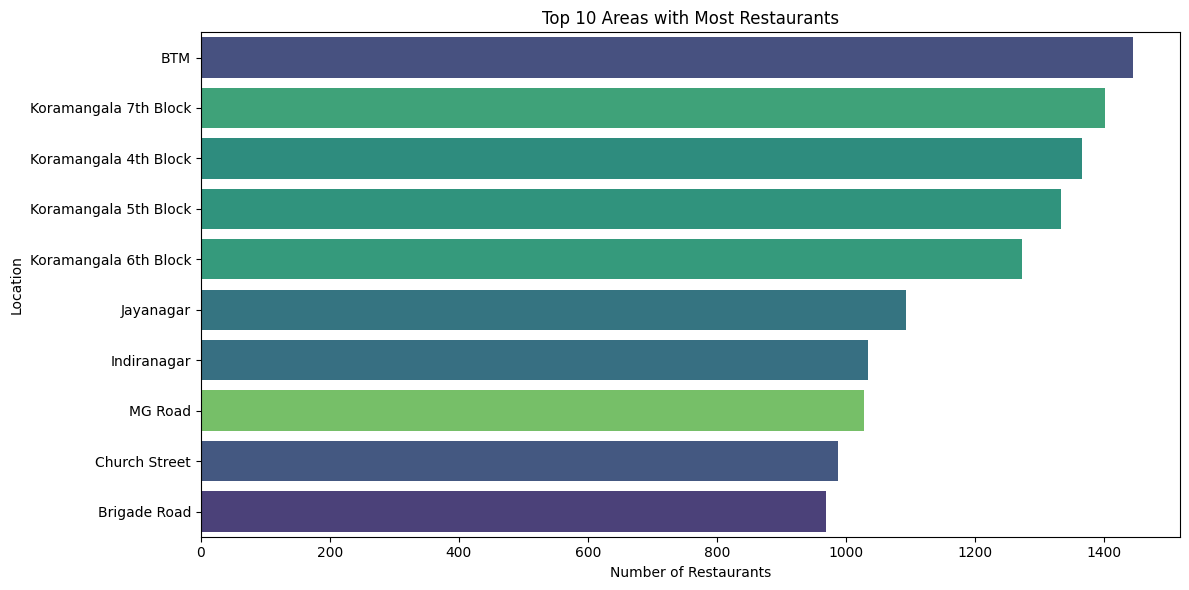

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y='listed_incity',
    hue='listed_incity',  
    order=df['listed_incity'].value_counts().head(10).index,
    palette='viridis',
    legend=False  
)
plt.title('Top 10 Areas with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


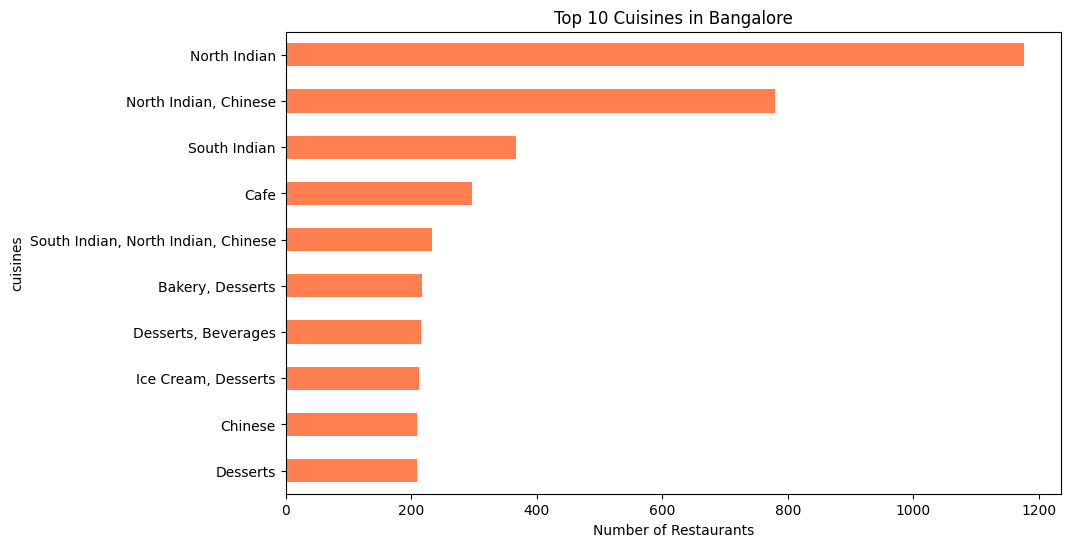

In [73]:
top_cuisines = df['cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', color='coral', figsize=(10,6), title='Top 10 Cuisines in Bangalore')
plt.xlabel("Number of Restaurants")
plt.gca().invert_yaxis()
plt.show()


In [90]:
geo_df = pd.read_csv(r"C:\Users\harsh\Downloads\Geographical Coordinates.csv")
merged_df = pd.merge(df, geo_df, on='listed_incity', how='left')
merged_df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,listed_intype,listed_incity,Latitude,Longitude
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,12.939333,77.553982
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari,12.939333,77.553982
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,12.939333,77.553982
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari,12.939333,77.553982
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari,12.939333,77.553982


In [91]:
merged_df.to_csv("merged_zomato_data.csv", index=False)


In [87]:
from folium.plugins import HeatMap

heat_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_df.iterrows()]

bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
HeatMap(heat_data, radius=10).add_to(bangalore_map)


In [86]:
italian_df = merged_df[merged_df['cuisines'].str.contains("Italian", na=False)]
italian_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)
marker_cluster = MarkerCluster().add_to(italian_map)
for index, row in italian_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Cuisine: Italian\nRating: {row['rate']}/5",
            tooltip=row['listed_incity']
        ).add_to(marker_cluster)


In [88]:
italian_map.save("italian_restaurants_map.html")
bangalore_map.save("restaurant_density_heatmap.html")
